In [1]:
import generator
import directions



In [2]:
directions = directions.Directions(20)

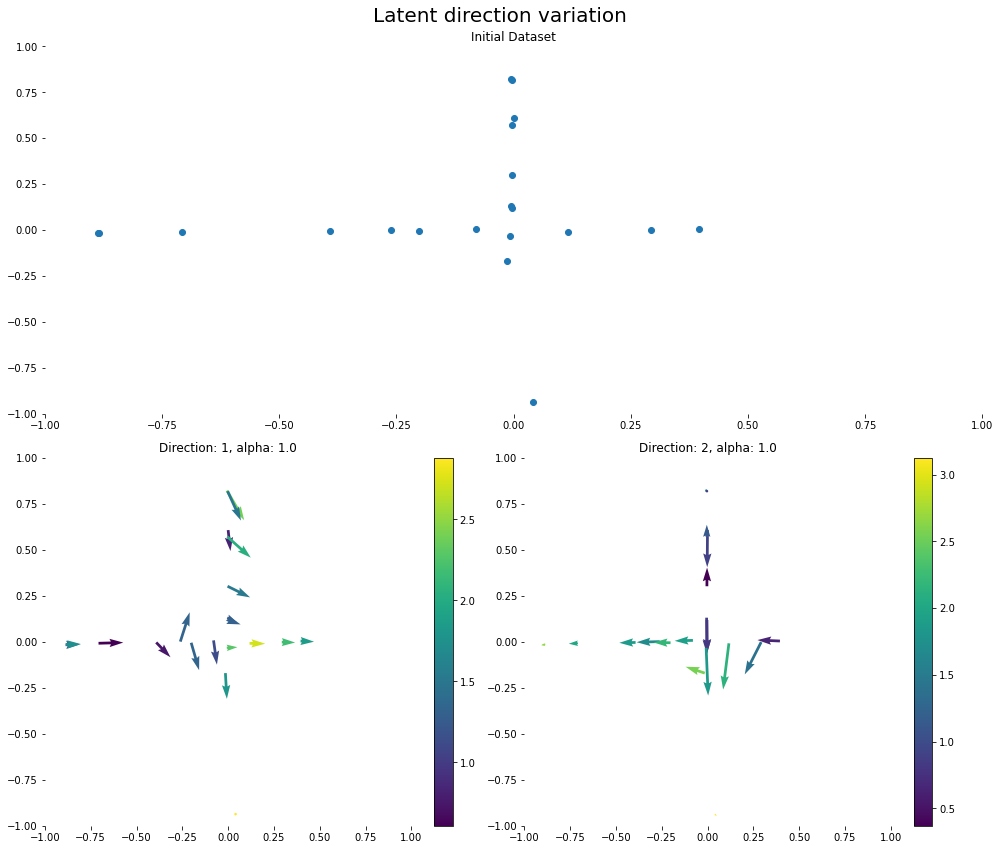

Preparing video ...
Done !


In [3]:
directions.vis_difference()
directions.video()

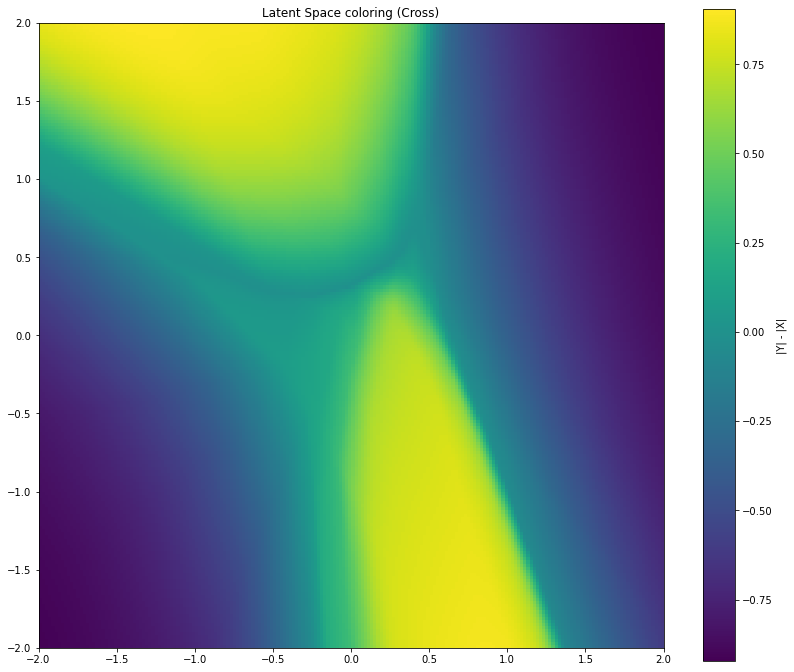

In [4]:
directions.vis_latent_space_abs()

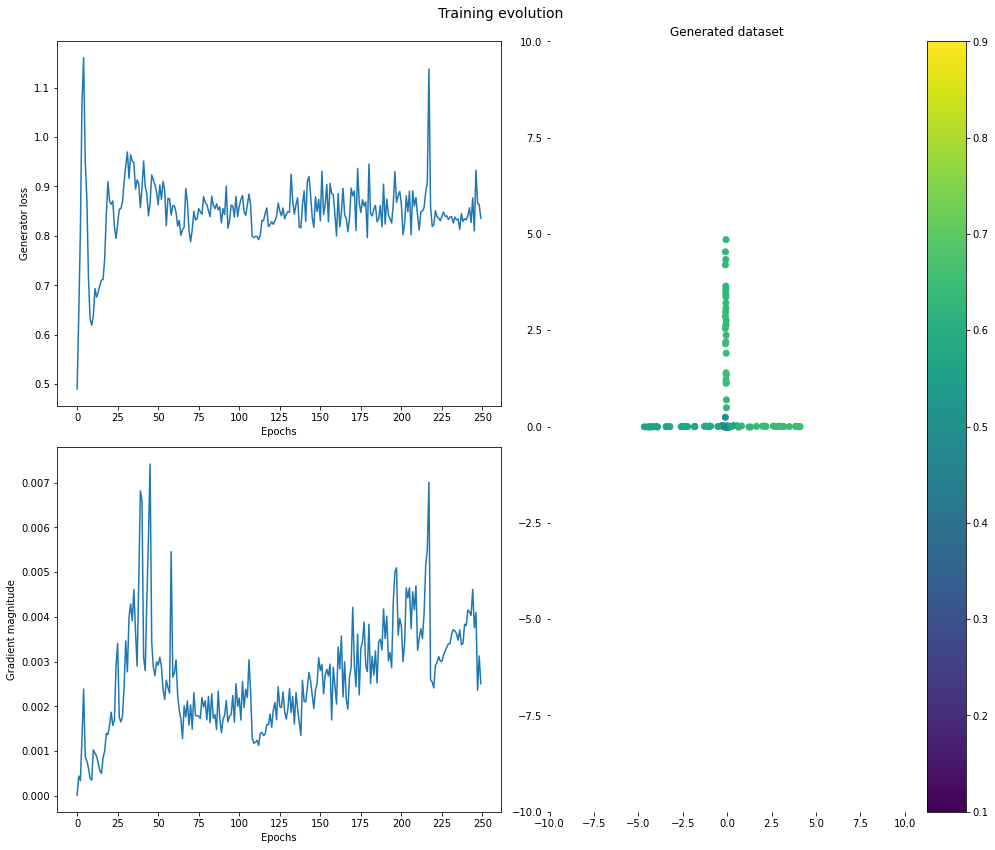

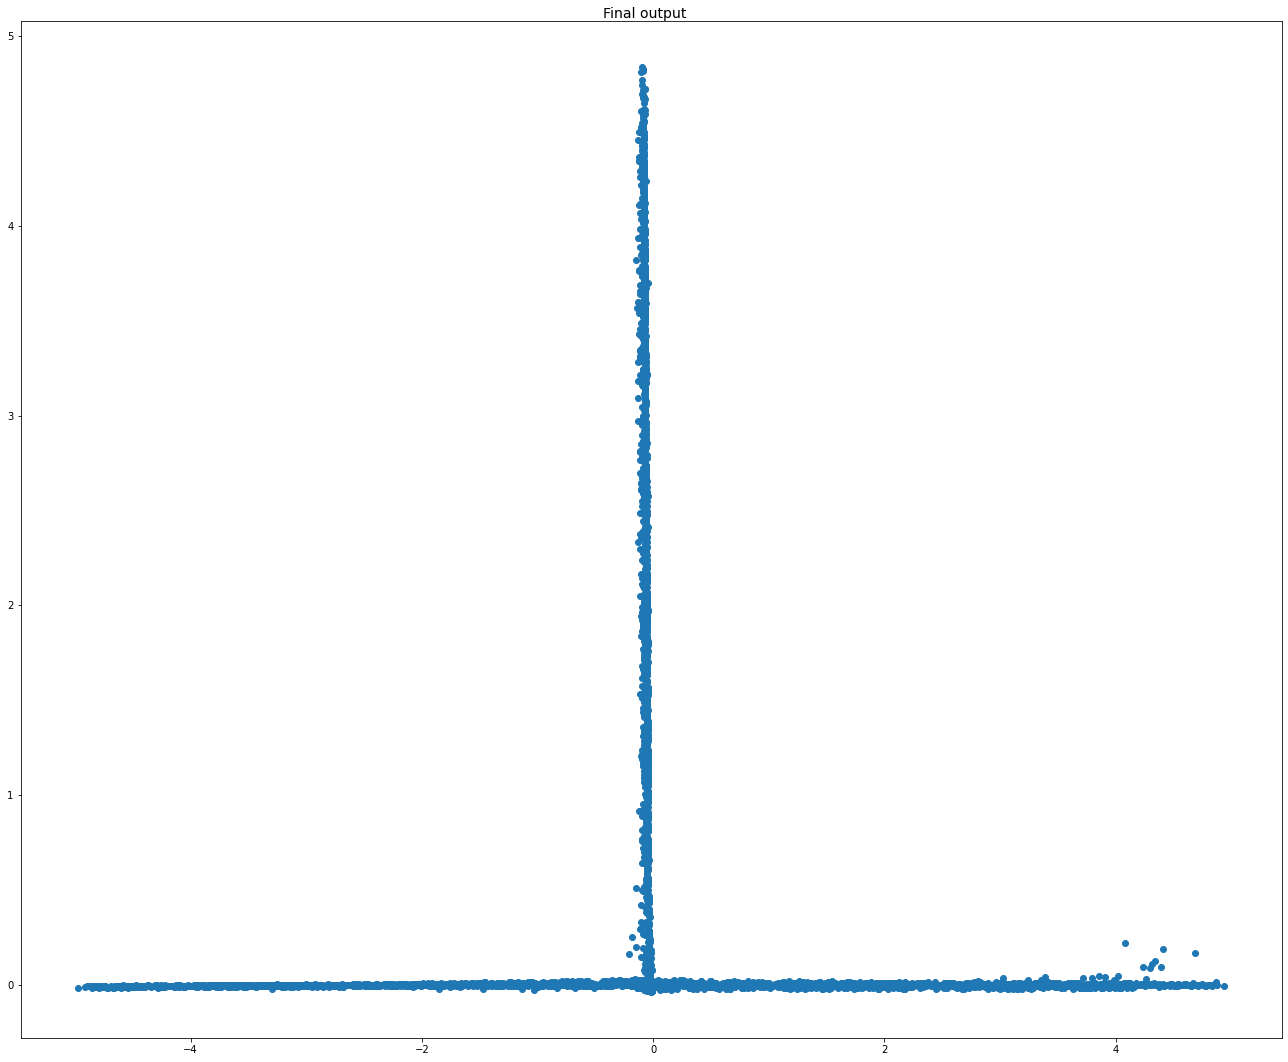

Preparing video ...
Done !
 Direction 1:
[-0.36807406  0.92979646]
 Direction 2:
[0.92979646 0.36807406]


In [2]:
trainer = generator.Trainer(eps=250,ds_size=4000,batch_size = 100)
trainer.cuda()
trainer.train(fix_latent_seed = True, seed_size = 100)
trainer.save_generator()
